In [1]:
#pip install klib


# Importer les bibliothèques nécessaires

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import klib
from scipy.stats import pointbiserialr
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [132]:
# Charger le fichier XLSX
data = pd.read_excel('Case Study.xlsx')

In [133]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year'],
      dtype='object')

In [134]:
data.shape

(1000, 38)

In [135]:
data.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [137]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [138]:
data.describe(include='object')

policy_state policy_csl insured_sex insured_education_level  \
count          1000       1000        1000                    1000   
unique            3          3           2                       7   
top              OH    250/500      FEMALE                      JD   
freq            352        351         537                     161   

       insured_occupation insured_hobbies insured_relationship  \
count                1000            1000                 1000   
unique                 14              20                    6   
top     machine-op-inspct         reading            own-child   
freq                   93              64                  183   

                  incident_type  collision_type incident_severity  \
count                      1000            1000              1000   
unique                        4               4                 4   
top     Multi-vehicle Collision  Rear Collision      Minor Damage   
freq                        419             292               354   

       authorities_contacted incident_state incident_city incident_location  \
count                   1000           1000          1000              1000   
unique                     5              7             7              1000   
top                   Police             NY   Springfield    9935 4th Drive   
freq                     292            262           157                 1   

       property_damage police_report_available auto_make auto_model  
count             1000                    1000      1000       1000  
unique               3                       3        14         39  
top                  ?                       ?      Saab        RAM  
freq               360                     343        80         43

In [139]:
data['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

# Exploration des données (EDA)

# Visualisation de données

Visualisation des distributions :

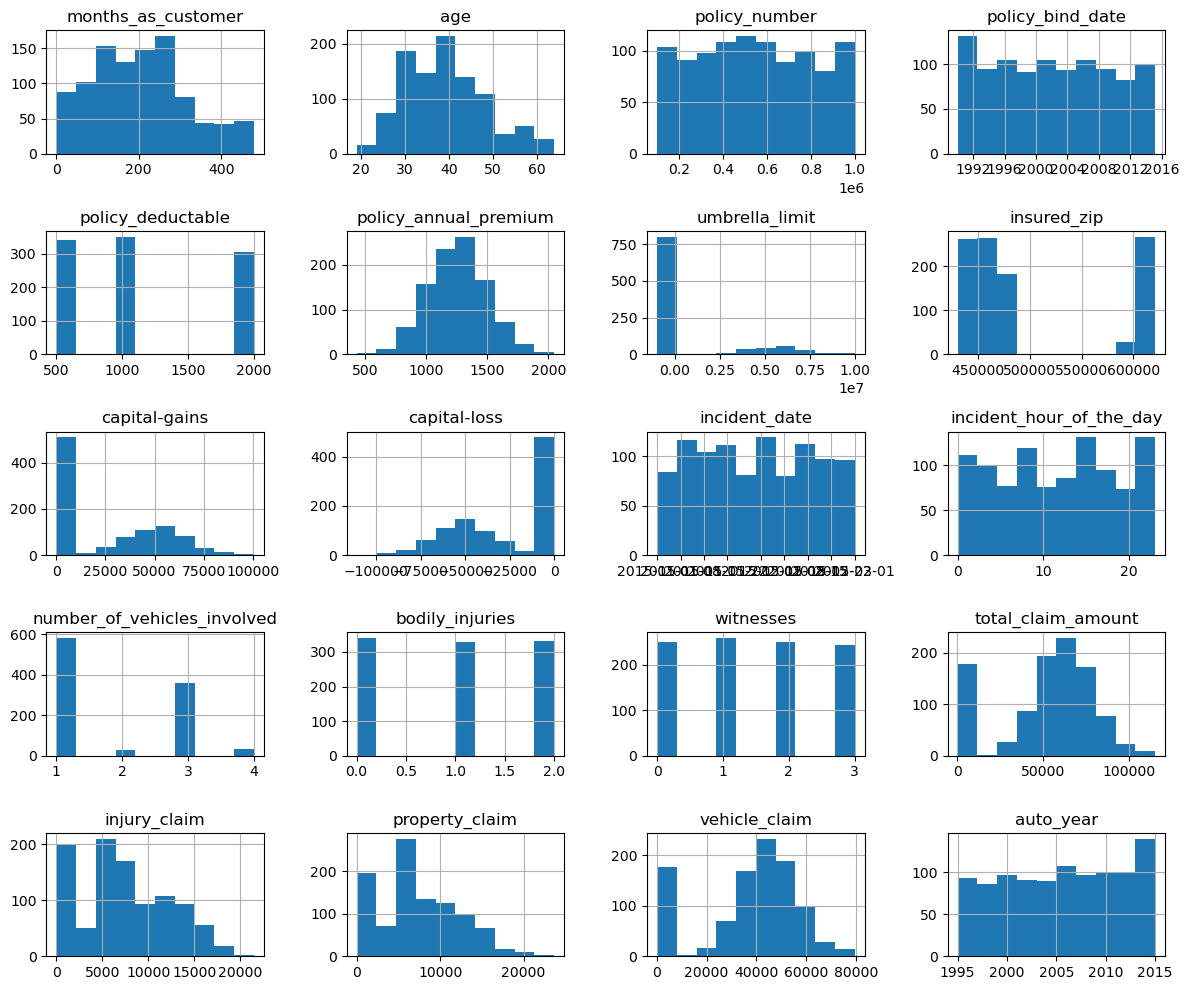

In [11]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Visualisation des relations entre variables :

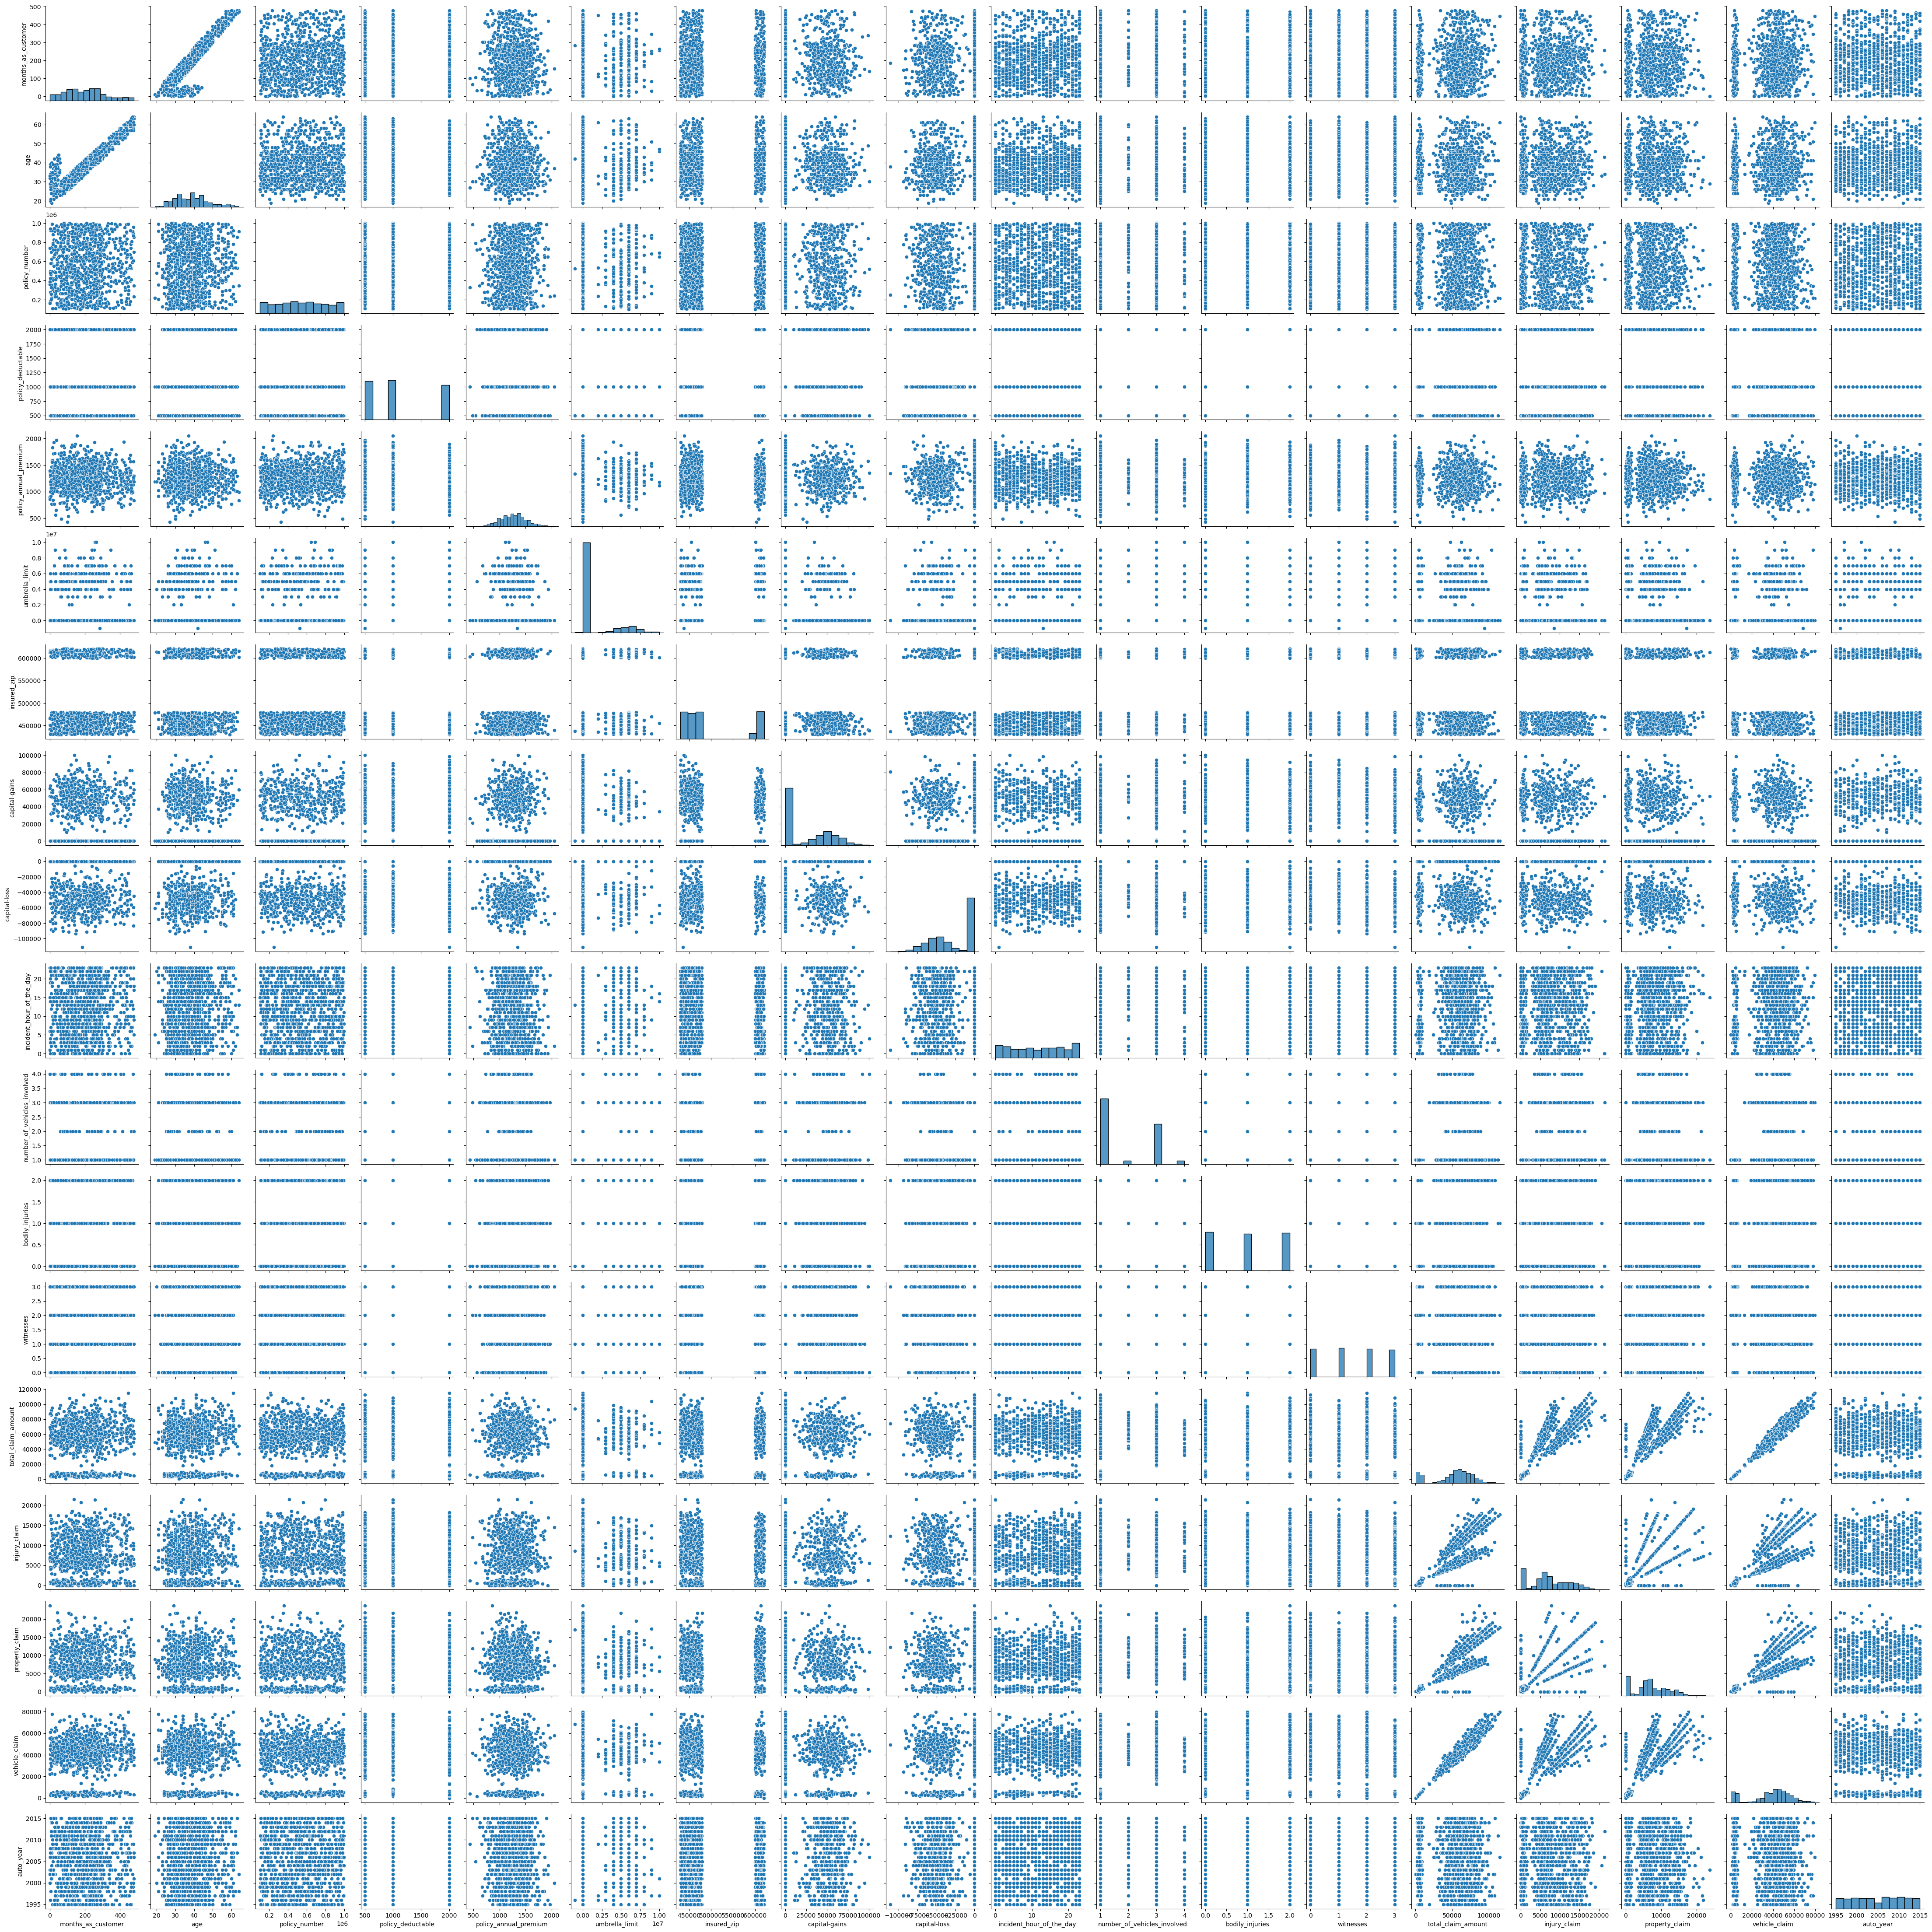

In [12]:
# Visualiser les relations entre variables continues avec un scatter plot
sns.pairplot(data)
plt.show()



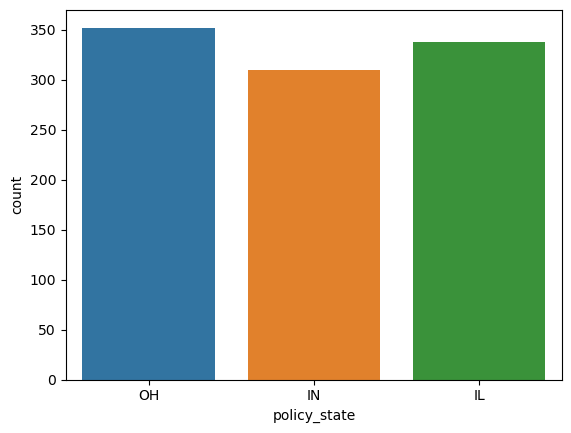

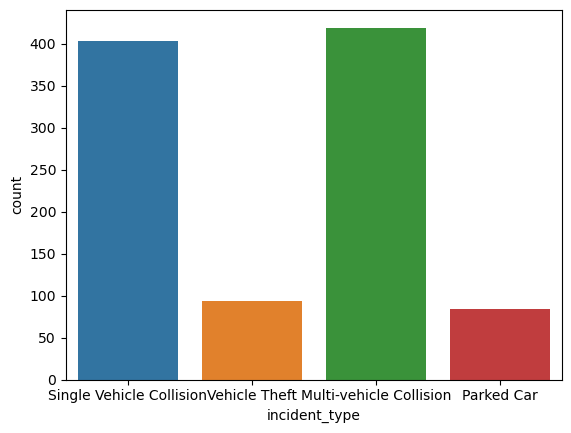

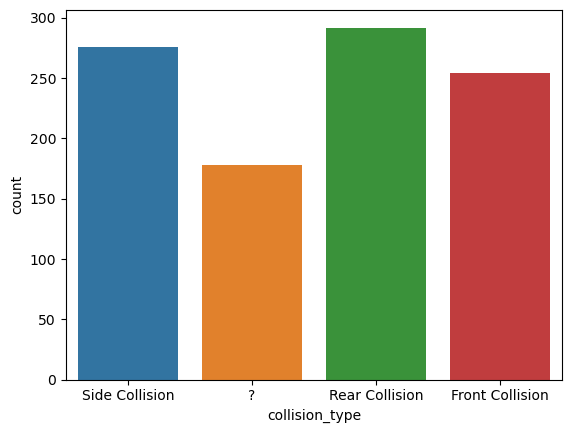

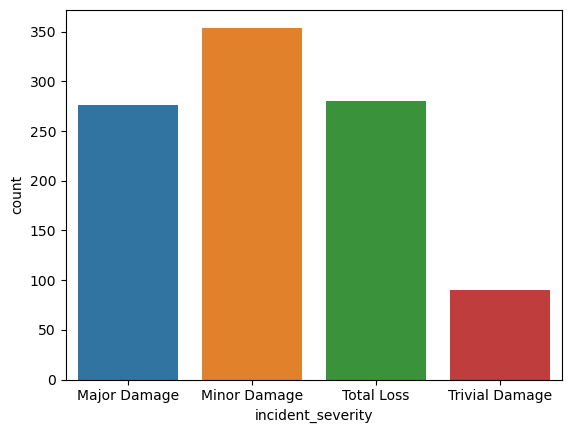

In [13]:
# Visualiser les variables catégorielles avec des graphiques à barres
categorical_vars = ['policy_state', 'incident_type', 'collision_type', 'incident_severity']
for var in categorical_vars:
    sns.countplot(x=var, data=data)
    plt.show()

In [14]:
data = data.replace({'umbrella_limit': '-1000000'}, '1000000') 



 ce code prend les données catégorielles d'un DataFrame, les transforme en un format plus facile à analyser, puis compte le nombre d'occurrences de chaque valeur catégorielle dans chaque colonne, et trie les résultats par nom de colonne et par fréquence croissante.
 La méthode .melt() est utilisée pour transformer le DataFrame en un format "long", ce qui signifie que chaque observation est représentée par une ligne unique. Dans ce cas, les noms de colonnes (var_name) deviennent une colonne dans le DataFrame résultant, tandis que les valeurs associées à ces colonnes sont placées dans une autre colonne appelée 'index'. Cette transformation est utile pour l'analyse exploratoire des données.

In [15]:
## Check categorical data
pd.set_option('display.max_rows', None)

pd.DataFrame(
        data[data.select_dtypes('object').columns.to_list()]
        .melt(var_name='columns', value_name='index')\
        .value_counts())\
        .sort_values(by=['columns',0])

0
columns                 index                        
authorities_contacted   None                       91
                        Ambulance                 196
                        Other                     198
                        Fire                      223
                        Police                    292
auto_make               Honda                      55
                        Mercedes                   65
                        Jeep                       67
                        Volkswagen                 68
                        Accura                     68
                        Audi                       69
                        Toyota                     70
                        BMW                        72
                        Ford                       72
                        Chevrolet                  76
                        Nissan                     78
                        Dodge                      80
                        Suburu                     80
                        Saab                       80
auto_model              RSX                        12
                        Accord                     13
                        M5                         15
                        X6                         16
                        C300                       18
                        3 Series                   18
                        Corolla                    20
                        CRV                        20
                        TL                         20
                        ML350                      20
                        Impreza                    20
                        Fusion                     21
                        Civic                      22
                        Highlander                 22
                        Silverado                  22
                        X5                         23
                        Ultima                     23
                        Maxima                     24
                        Escape                     24
                        Tahoe                      24
                        93                         25
                        Grand Cherokee             25
                        95                         27
                        F150                       27
                        E400                       27
                        Camry                      28
                        92x                        28
                        Forrestor                  28
                        Malibu                     30
                        Pathfinder                 31
                        Legacy                     32
                        A5                         32
                        Passat                     33
                        Jetta                      35
                        MDX                        36
                        A3                         37
                        Neon                       37
                        Wrangler                   42
                        RAM                        43
collision_type          ?                         178
                        Front Collision           254
                        Side Collision            276
                        Rear Collision            292
incident_city           Northbrook                122
                        Riverwood                 134
                        Hillsdale                 141
                        Northbend                 145
                        Columbus                  149
                        Arlington                 152
                        Springfield               157
incident_location       7155 Apache Drive           1
                        7178 Best Drive             1
                        7168 Andromedia Ridge       1
                        7162 Maple Ave              1
  

In [16]:
data['incident_location'].nunique()

1000

puisque la colonne incident_location a autant de valeurs uniques que le nombre total de lignes, cela signifie que chaque ligne a une valeur différente dans cette colonne. Donc la colonne "incident_location" n'apporte  pas beaucoup d'information discriminante et pourrait ne pas être très utile pour cette analyse. 

In [140]:
data.drop(columns=['incident_location'], inplace=True)


In [141]:
data.shape

(1000, 37)

In [142]:
data.drop(columns=['insured_relationship'], inplace=True)
data.drop(columns=['insured_education_level'], inplace=True)


Nous utiliserons un graphique KDE (Kernel Density Estimate) en utilisant klib.dist_plot pour permettre une meilleure compréhension de la distribution des caractéristiques numériques, en donnant la moyenne, la médiane et l'écart-type.

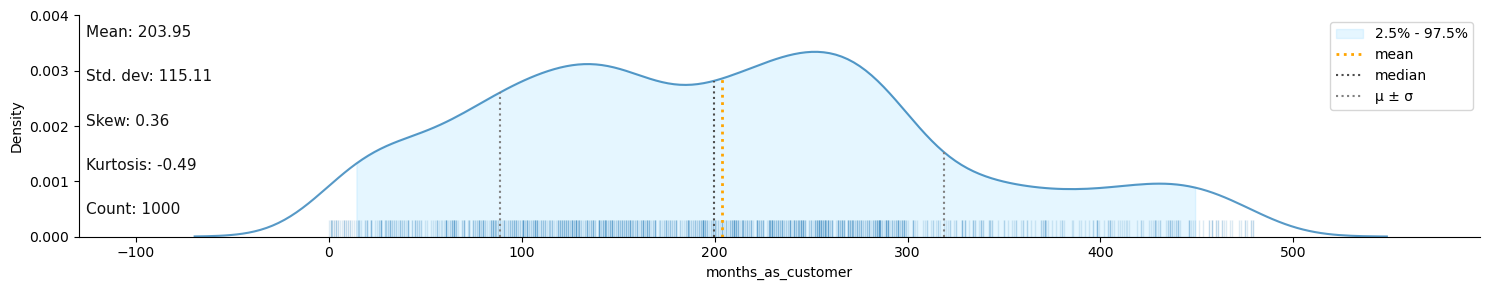

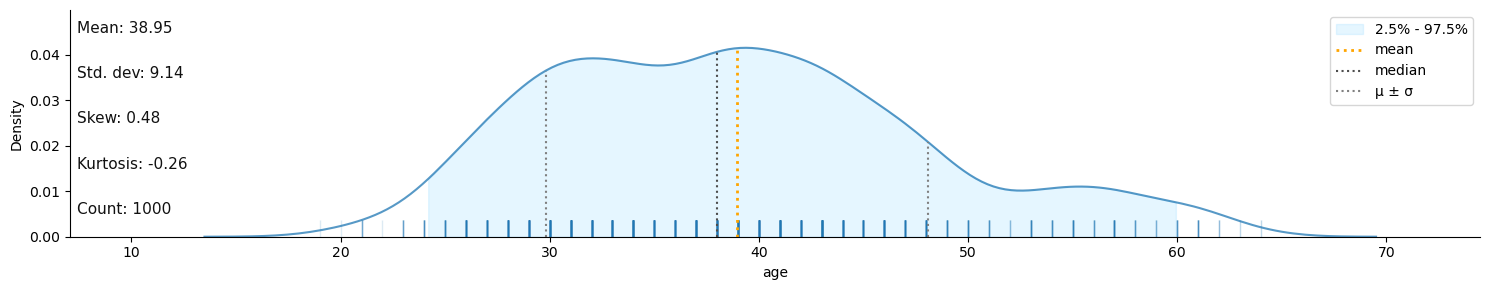

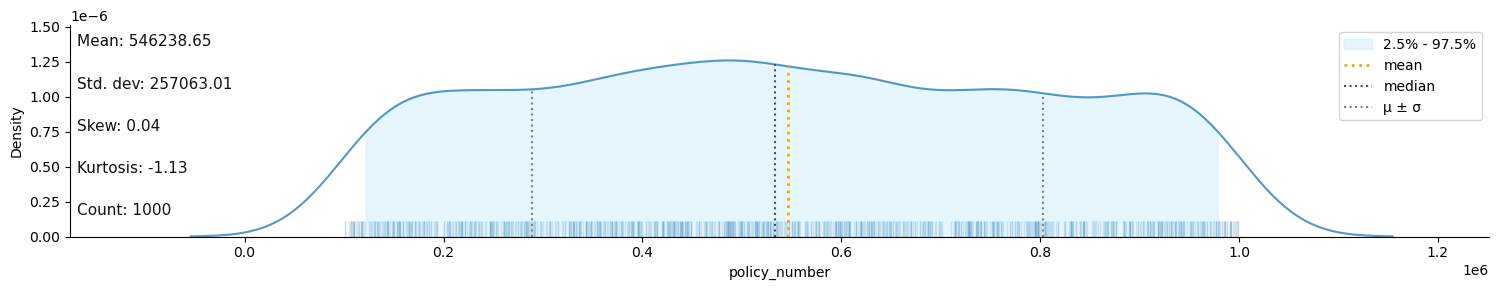

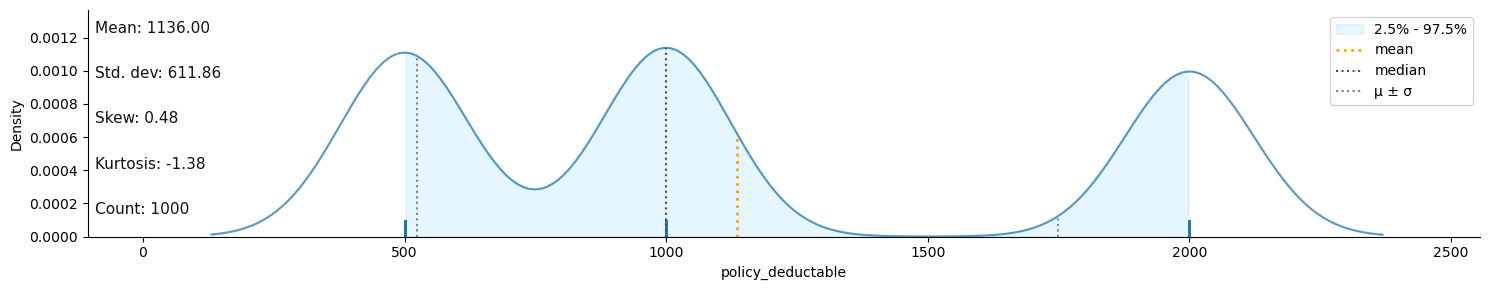

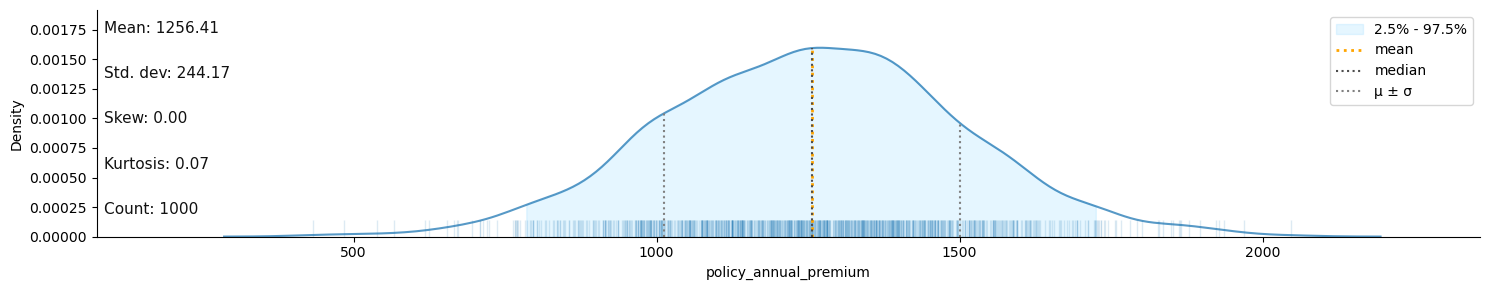

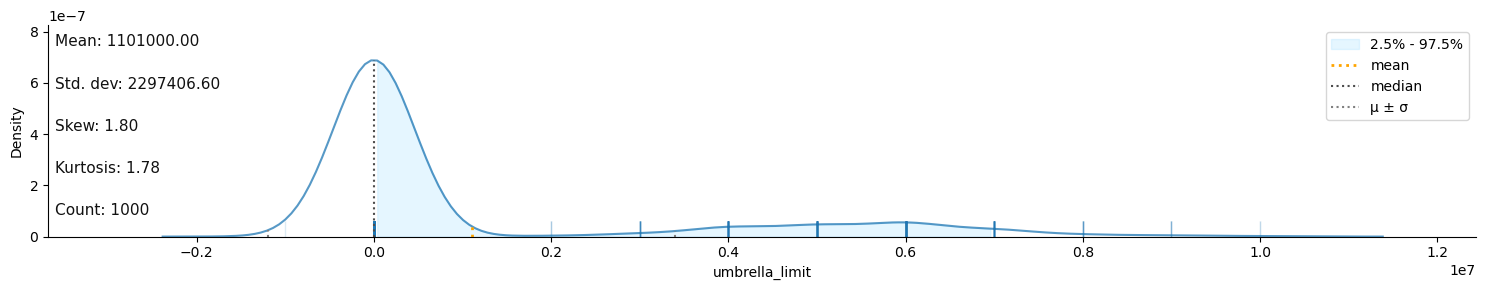

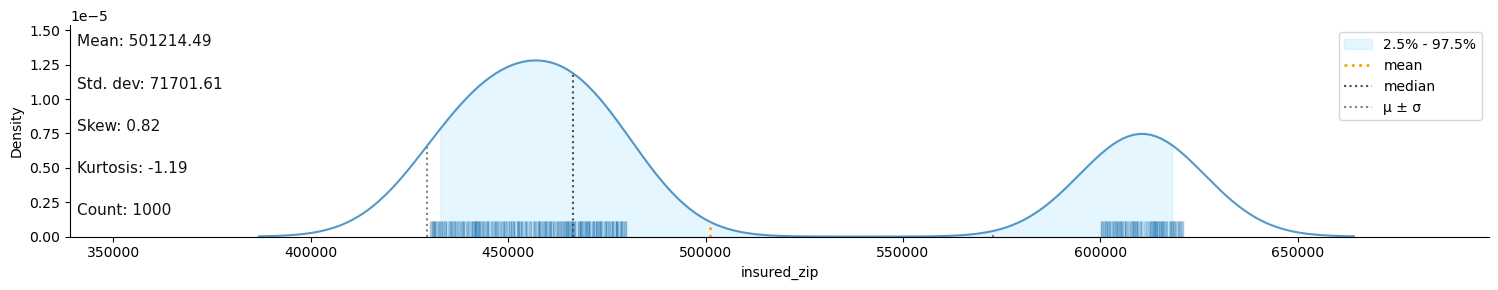

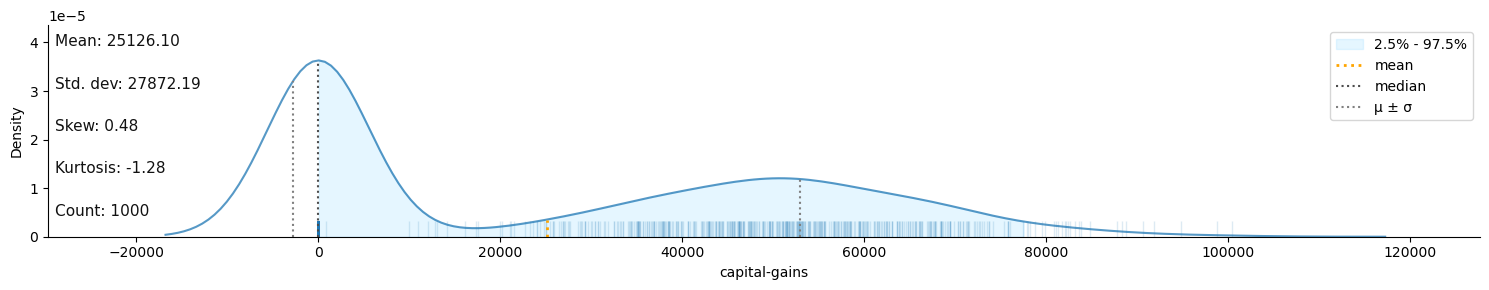

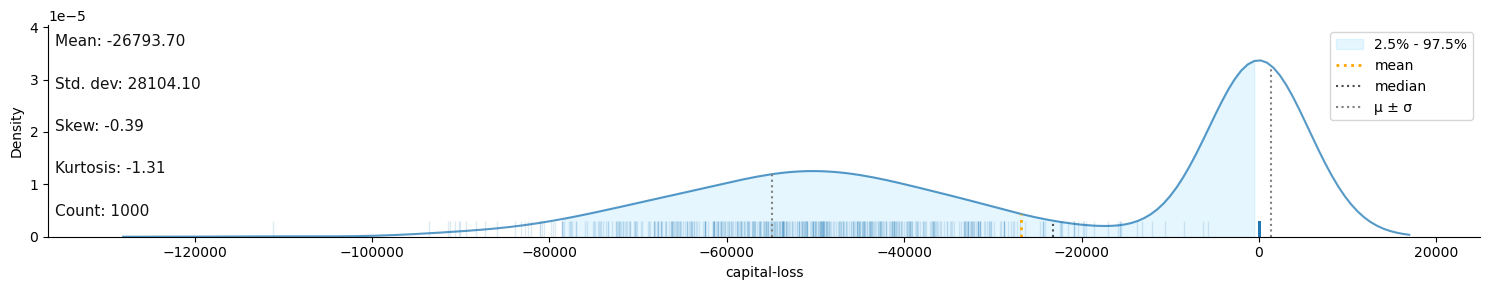

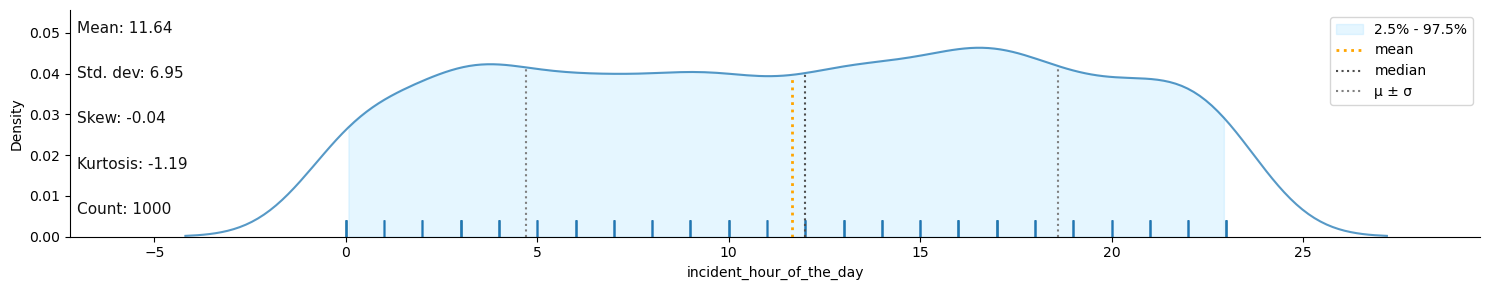

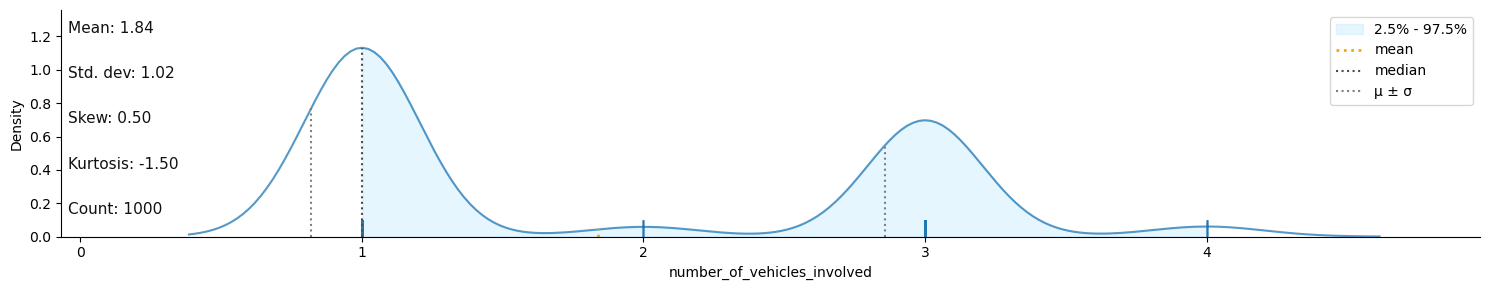

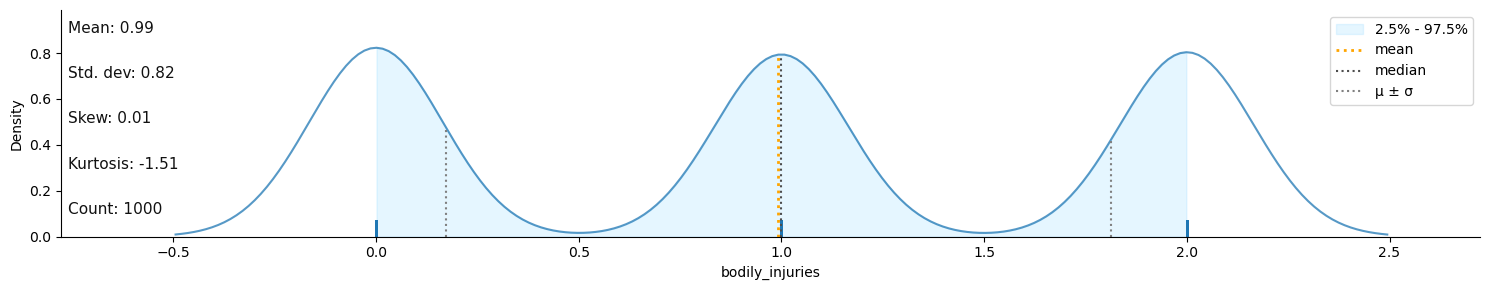

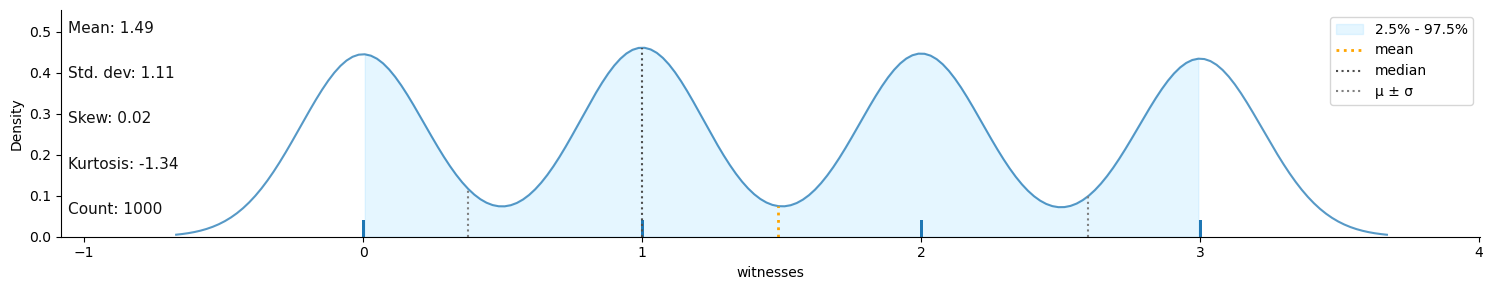

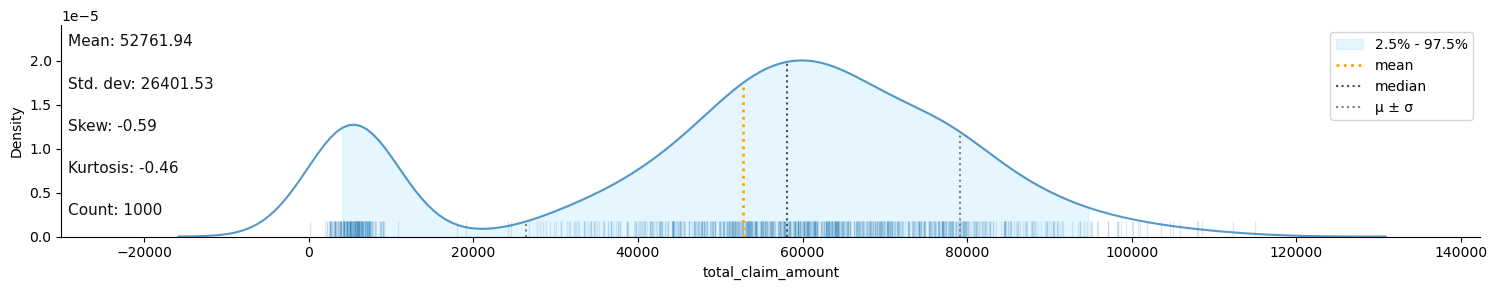

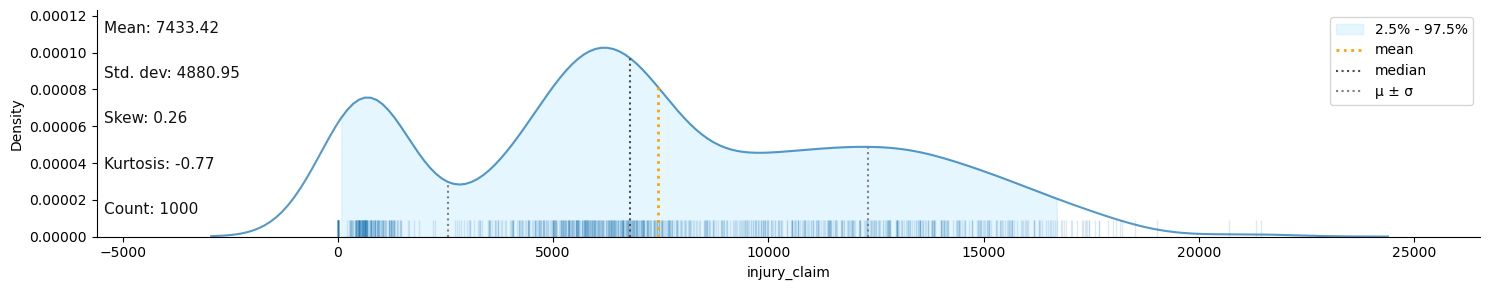

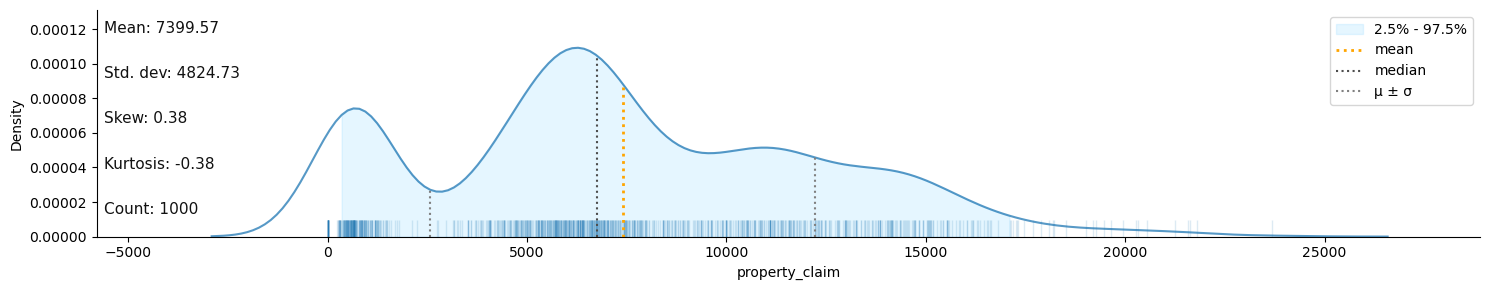

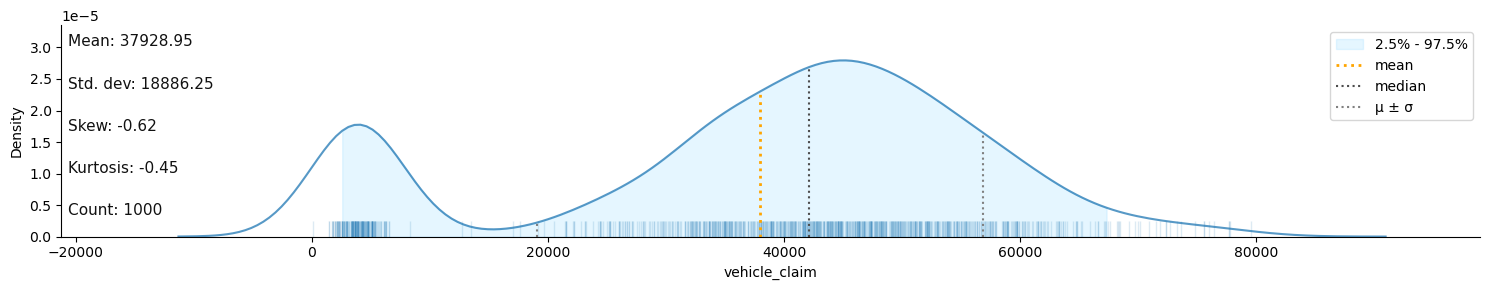

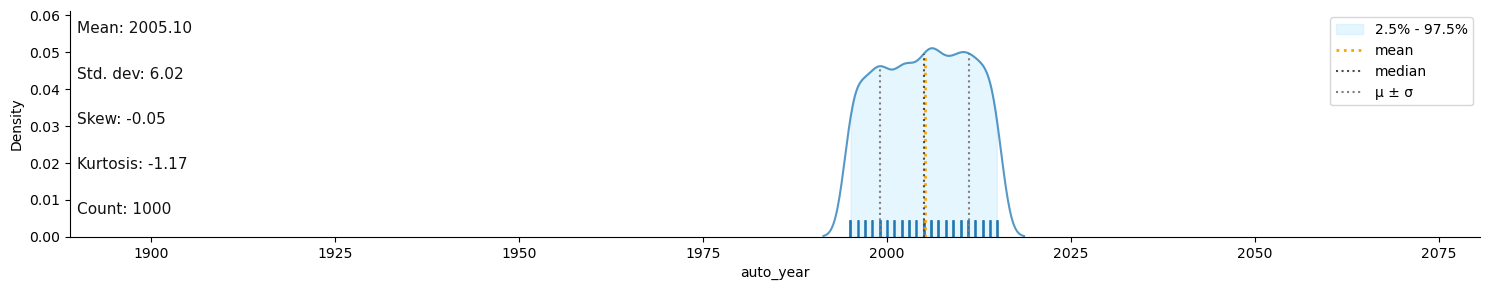

In [20]:


# Obtenez la liste des colonnes numériques
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Générer des graphiques de distribution pour chaque colonne numérique
for column in numeric_columns:
    klib.dist_plot(data[column])


On souhaite inspecter rapidement les valeurs numeriques moyennes en fonction de regroupement categoriques pour les colonnes avec un petit nombre de categories uniques 

In [23]:
list_cat_col = []

for col in data.columns:
    if (data[col].dtype =='object'):
        list_cat_col.append(col)

list_num_col = []

for col in data.columns:
    if (data[col].dtype =='int64'):
        list_num_col.append(col)

In [24]:
for col in list_cat_col:
    if data[col].nunique() <= 5:
        display(data.groupby(col)[list_num_col].mean().style.background_gradient(cmap='Blues'))

# Gestion des valeurs manquantes

In [143]:
#remplacer toute ? en nan
for column in data.columns:
    if data[column].apply(lambda x: x == '?').any():
        data[column] = data[column].replace("?", np.nan)


In [144]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_occupation               0
insured_hobbies                  0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount  

on a des valeurs manquantes juste pour les colonnes collision_type , property_damage ,police_report_available qui sont des valeurs categoriques 

Donc pour gerer les valeurs manquantes on peut soit les supprimer ou les remplacer par la categorie la plus fréquente dans la colonne .Cela peut être fait en utilisant la classe SimpleImputer de scikit-learn avec la stratégie "most_frequent".


In [145]:
from sklearn.impute import SimpleImputer

# Créez un imputeur avec la stratégie 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Sélectionnez uniquement les colonnes binaires
colonnes_binaires = ['police_report_available', 'property_damage', 'collision_type']  # Remplacez ceci par les noms de vos colonnes binaires

# Ajustez et transformez les données binaires uniquement
data[colonnes_binaires] = imputer.fit_transform(data[colonnes_binaires])


In [146]:
data.isna().sum()


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_occupation             0
insured_hobbies                0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

In [147]:
data.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_occupation                     object
insured_hobbies                        object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                     

# les variables catégorielles en variables numériques

In [29]:
data['property_damage'] = data['property_damage'].map({'YES': 1, 'NO': 0})

In [30]:
data['police_report_available'] = data['police_report_available'].map({'YES': 1, 'NO': 0})

In [31]:
data['insured_sex'] = data['insured_sex'].map({'FEMALE': 1, 'MALE': 2})

In [32]:
data['policy_state'] = data['policy_state'].map({'OH': 1, 'IN': 2 , 'IL' : 3})

# Gestion des valeurs aberrantes

diviser notre bases de donnees en colonnes numeriques et colonnes categoriques 

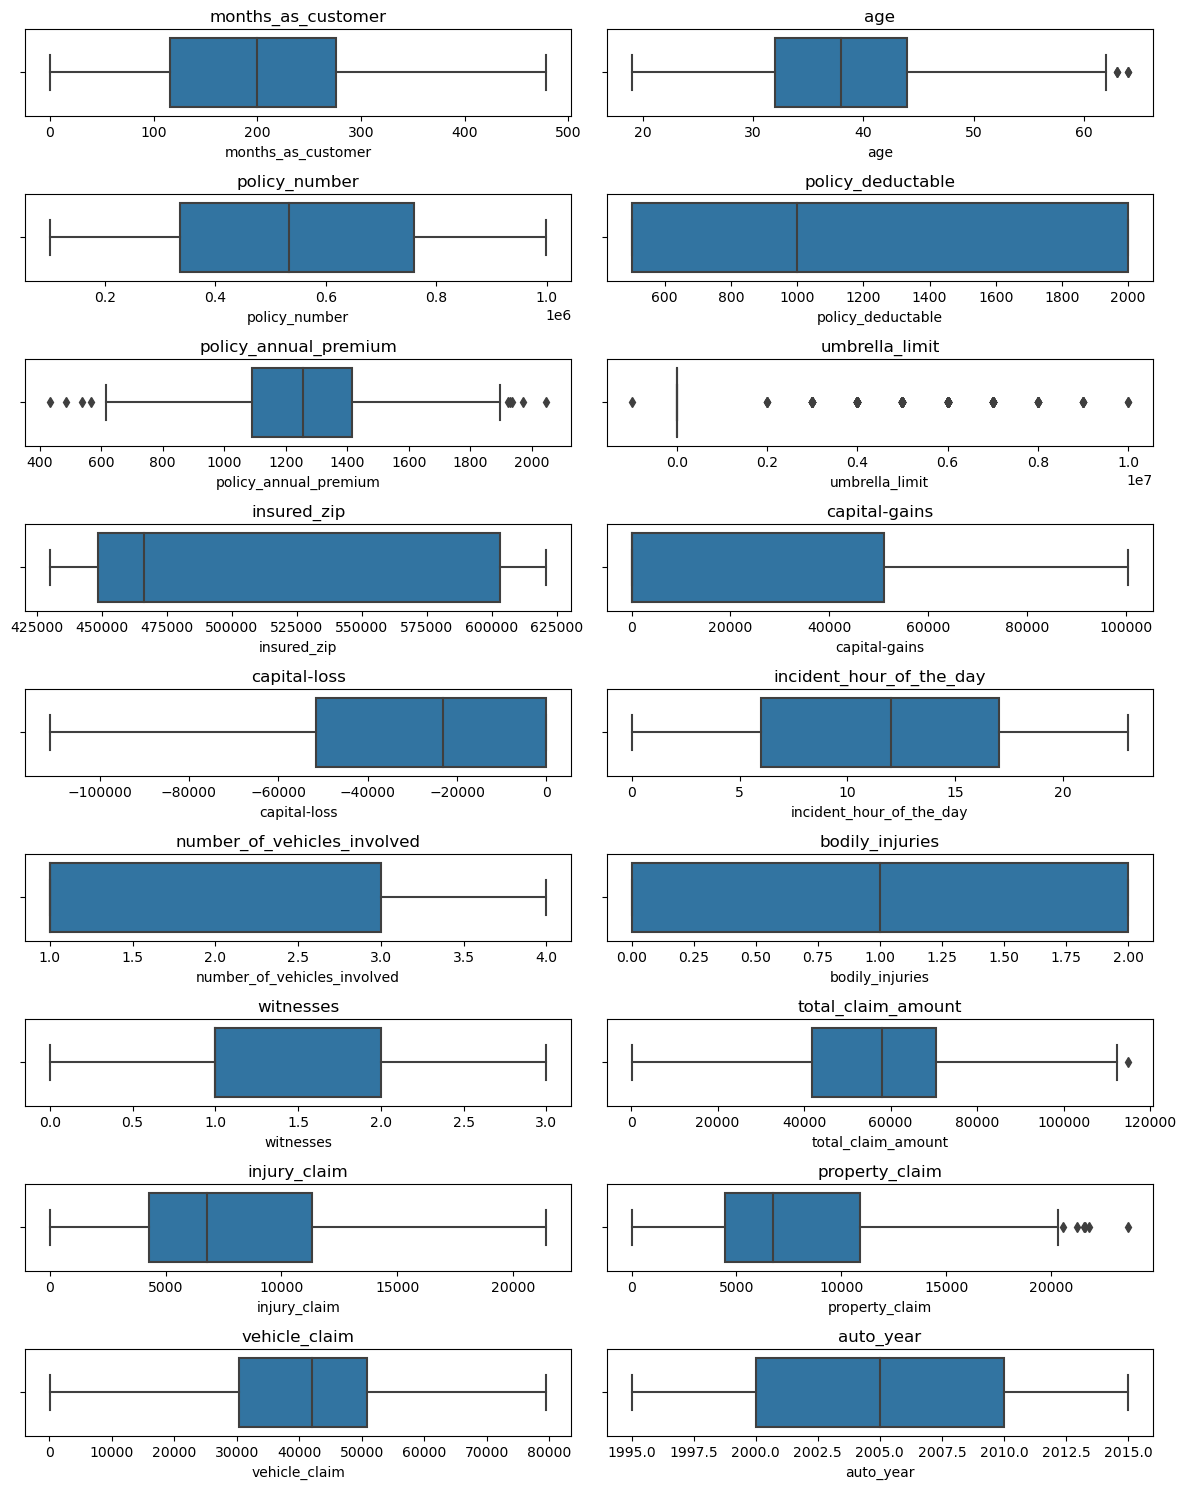

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'data' est votre DataFrame contenant les données
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for the subplot grid
num_cols = len(numeric_columns)
num_rows = (num_cols + 1) // 2  # Add 1 to handle odd number of columns

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 15))

# Itérer sur chaque colonne numérique
for i, column in enumerate(numeric_columns):
    # Calculate the row and column index for the current subplot
    row = i // 2
    col = i % 2

    # Créer un graphique de boîte pour la colonne actuelle
    sns.boxplot(x=data[column], ax=axs[row, col])
    axs[row, col].set_title(column)  # Définir le titre de chaque sous-tracé

# Supprimer les sous-tracés vides s'il y en a
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


En utilisant sns.boxplot qui affiche le résumé des cinq nombres d'une caractéristique numérique. Les cinq nombres sont le minimum, le premier quartile (Q1 ou marque 25%), la médiane (Q2), le troisième quartile (Q3 ou marque 75%), et le maximum.

In [148]:
def remove_outlier(set_data, numeric_columns):
    list_of_set_data = []

    for col in numeric_columns:
        q1 = set_data[col].quantile(0.25)
        q3 = set_data[col].quantile(0.75)
        iqr = q3 - q1

        # Filtrer les valeurs aberrantes en dehors de la plage [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
        set_data_cleaned = set_data[~((set_data[col] < (q1 - 1.5 * iqr)) | (set_data[col] > (q3 + 1.5 * iqr)))].copy()
        list_of_set_data.append(set_data_cleaned.copy())

    # Concaténer les données nettoyées
    set_data_cleaned = pd.concat(list_of_set_data)


    return set_data_cleaned


In [149]:

data3 = remove_outlier(data,numeric_columns)

In [150]:
data3.dtypes


months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_occupation                     object
insured_hobbies                        object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                     

# Selection des caractéristiques


 <p style="font-family: Arial; font-size:2.10em;color:blue; font-style:bold"><br>
 corrélation entre les variables numeriques </p><br>

In [36]:
numeric_columns_ = data3.select_dtypes(include=['int64', 'float64']).columns


In [116]:
# Séparer les variables numériques
numeric_data = data3.select_dtypes(include=['int64', 'float64'])


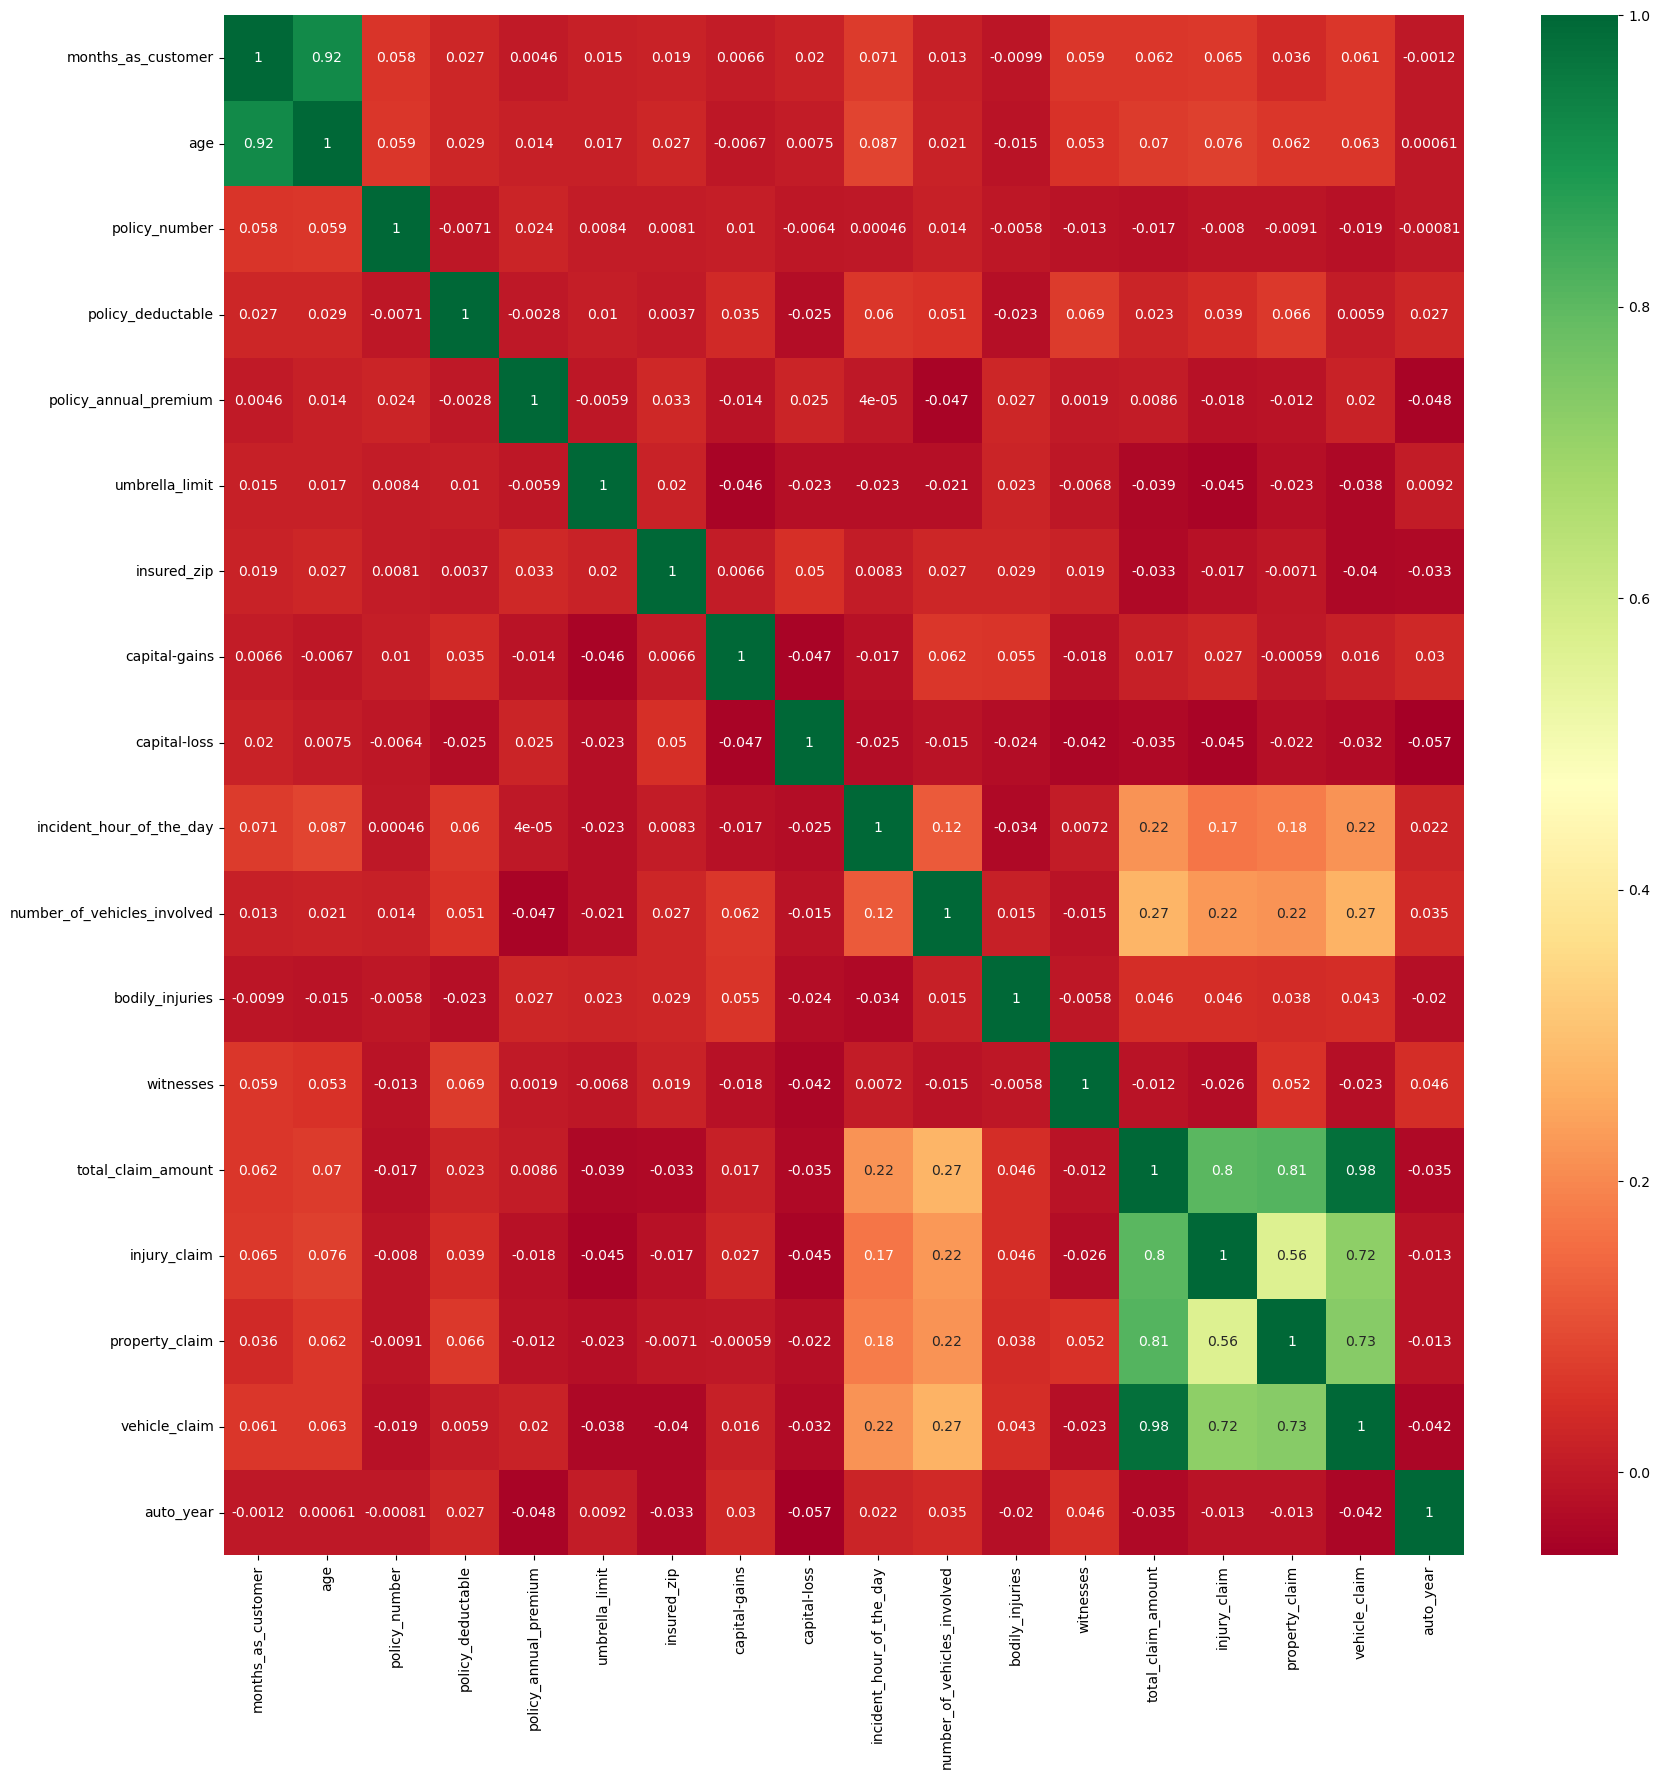

In [117]:

#get correlations of each features in dataset
corrmat = numeric_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(numeric_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

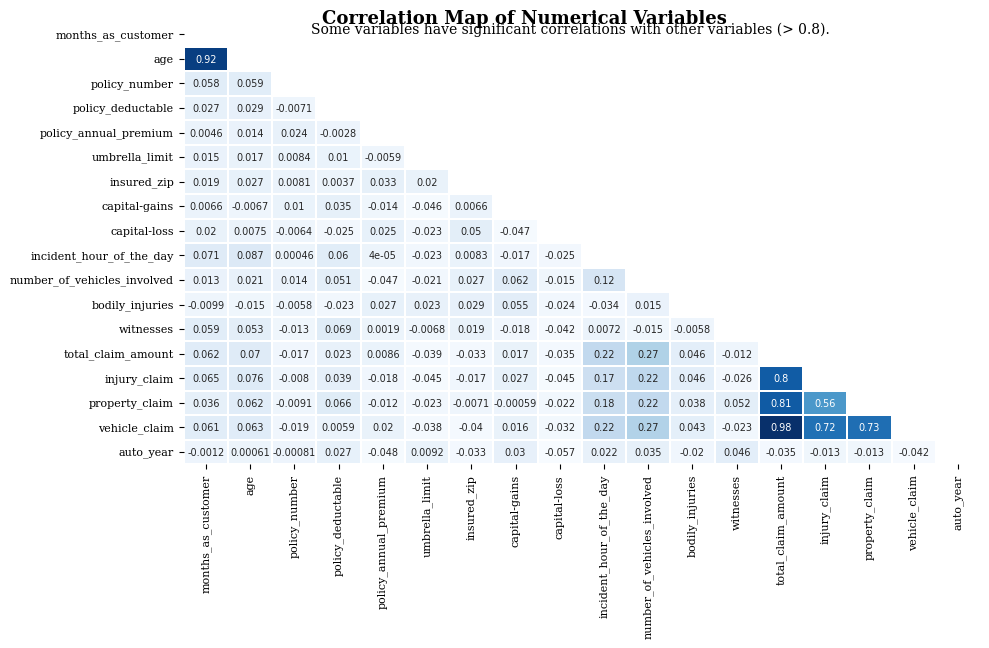

In [118]:
train_corr = numeric_data.copy()



# -- Create Figure -- #
fig, ax = plt.subplots(figsize=(10,7))



# --- Create Mask --- #
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# --- Cretea heatmap --- #
sns.heatmap(corrmat, annot=True, mask=mask, cmap='Blues', linewidths=0.1, cbar=False, annot_kws={"size":7})

# --- Figuration Setting --- #
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=8, fontfamily='serif')
ax.set_yticklabels(ylabels, size=8, fontfamily='serif')
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.327, y=0.96, ha='left', fontsize=13, fontfamily='serif')
plt.title('Some variables have significant correlations with other variables (> 0.8).\n', fontsize=10, x=0.16, y=0.92, fontfamily='serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [119]:
data3.drop(columns=['auto_year'], inplace=True)

creer une matrice de correlation et selectionner les paires de variables qui ont une correlation superieur a 0.8 . Ensuite , on transfoeme cette matrice en une dataframe en elimineat les redondances pour obtenir les paires de variables correlées.
=> ce code identifie les paires de variables fortement corrélées avec une correlation sup a 0.8

In [120]:
import copy

# Create threshold of 0.8 correlation
corr_multi = corrmat[corrmat>=0.8].reset_index()

# melted to get the features with >= 0.8 value
melted_corr = pd.melt(copy.deepcopy(corr_multi), id_vars='index', var_name='column_name', value_name='correlation').sort_values(by=['correlation']).dropna()
melted_corr.columns = ['row_name', 'column_name', 'correlation']

# Drop the features that correlated each other
melted_corr = melted_corr[melted_corr['row_name'] != melted_corr['column_name']].drop_duplicates(subset='correlation')

melted_corr

row_name         column_name  correlation
265  total_claim_amount        injury_claim     0.804767
283  total_claim_amount      property_claim     0.810484
1                   age  months_as_customer     0.922033
301  total_claim_amount       vehicle_claim     0.982745

total_claim_amount vs. injury_claim : Ces deux variables sont fortement corrélées avec une corrélation de 0.805025. Cela signifie qu'il y a une corrélation positive significative
total_claim_amount vs. property_claim : Ces deux variables sont également fortement corrélées avec une corrélation de 0.810686.
de meme pour les 2 autres paires 
Lorsque deux variables sont fortement corrélées elles fournissent essentiellement la meme information .

Pour réduire la multicolinéarité, nous pouvons soit supprimer total_claim_amount des données, puisque total_claim_amount = injury_claim + property_claim + vehicle_claim,

ou supprimer les trois autres (injury_claim, property_claim, vehicle_claim).



In [121]:
data3.drop(columns=['total_claim_amount'], inplace=True)

In [122]:
data3.drop(columns=['age'], inplace=True)


 <p style="font-family: Arial; font-size:1.80em;color:blue; font-style:bold"><br>
 Corréltion entre variables numeriques et variables categoriques</p><br>

In [152]:
from scipy.stats import pointbiserialr
import pandas as pd
categorical_data = data3.select_dtypes(include=['object'])
numeric_data = data3.select_dtypes(include=['int64', 'float64'])

# Encodez les données catégoriques
categorical_data_encoded = pd.get_dummies(categorical_data)
# Initialiser la liste des résultats de corrélation
correlation_results = []

# Boucle sur les colonnes numériques et catégoriques pour calculer la corrélation
for numeric_column in numeric_data.columns:
    for categorical_column in categorical_data_encoded.columns:
        correlation, p_value = pointbiserialr(numeric_data[numeric_column], categorical_data_encoded[categorical_column])
        correlation_results.append({
            'Variable numérique': numeric_column,
            'Variable catégorique': categorical_column,
            'Corrélation': correlation,
            'p-value': p_value
        })

# Créer un dataframe à partir des résultats de corrélation
correlation_df = pd.DataFrame(correlation_results)


In [153]:
correlation_df

Variable numérique                    Variable catégorique  \
0              months_as_customer                         policy_state_IL   
1              months_as_customer                         policy_state_IN   
2              months_as_customer                         policy_state_OH   
3              months_as_customer                      policy_csl_100/300   
4              months_as_customer                      policy_csl_250/500   
5              months_as_customer                     policy_csl_500/1000   
6              months_as_customer                      insured_sex_FEMALE   
7              months_as_customer                        insured_sex_MALE   
8              months_as_customer         insured_occupation_adm-clerical   
9              months_as_customer         insured_occupation_armed-forces   
10             months_as_customer         insured_occupation_craft-repair   
11             months_as_customer      insured_occupation_exec-managerial   
12             months_as_customer      insured_occupation_farming-fishing   
13             months_as_customer    insured_occupation_handlers-cleaners   
14             months_as_customer    insured_occupation_machine-op-inspct   
15             months_as_customer        insured_occupation_other-service   
16             months_as_customer      insured_occupation_priv-house-serv   
17             months_as_customer       insured_occupation_prof-specialty   
18             months_as_customer      insured_occupation_protective-serv   
19             months_as_customer                insured_occupation_sales   
20             months_as_customer         insured_occupation_tech-support   
21             months_as_customer     insured_occupation_transport-moving   
22             months_as_customer            insured_hobbies_base-jumping   
23             months_as_customer              insured_hobbies_basketball   
24             months_as_customer             insured_hobbies_board-games   
25             months_as_customer          insured_hobbies_bungie-jumping   
26             months_as_customer                 insured_hobbies_camping   
27             months_as_customer                   insured_hobbies_chess   
28             months_as_customer               insured_hobbies_cross-fit   
29             months_as_customer                 insured_hobbies_dancing   
30             months_as_customer                insured_hobbies_exercise   
31             months_as_customer                    insured_hobbies_golf   
32             months_as_customer                  insured_hobbies_hiking   
33             months_as_customer                insured_hobbies_kayaking   
34             months_as_customer                  insured_hobbies_movies   
35             months_as_customer               insured_hobbies_paintball   
36             months_as_customer                    insured_hobbies_polo   
37             months_as_customer                 insured_hobbies_reading   
38             months_as_customer               insured_hobbies_skydiving   
39             months_as_customer                insured_hobbies_sleeping   
40             months_as_customer             insured_hobbies_video-games   
41             months_as_customer                insured_hobbies_yachting   
42             months_as_customer   incident_type_Multi-vehicle Collision   
43             months_as_customer                incident_type_Parked Car   
44             months_as_customer  incident_type_Single Vehicle Collision   
45             months_as_customer             incident_type_Vehicle Theft   
46             months_as_customer          collision_type_Front Collision   
47             months_as_customer           collision_type_Rear Collision   
48             months_as_customer           collision_type_Side Collision   
49             months_as_customer          incident_severity_Major Damage   
50             months_as_customer          incident_severity_Minor Damage   
51         

Chaque ligne représente la corrélation entre une variable numérique et une variable catégorique spécifique, avec le coefficient de corrélation (corr) et la valeur p (p-value) associée à cette corrélation.

In [127]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Sélection des caractéristiques numériques et catégorielles
numeric_features = data3.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data3.select_dtypes(include=['object']).columns.tolist()

# Prétraitement des caractéristiques catégorielles avec LabelEncoder
label_encoders = {}
for feature in categorical_features:
    # Conversion des valeurs catégorielles en chaînes de caractères
    data3[feature] = data3[feature].astype(str)
    # Utilisation de LabelEncoder
    label_encoders[feature] = LabelEncoder()
    data3[feature] = label_encoders[feature].fit_transform(data3[feature])

# Sélection des caractéristiques à utiliser
X = data3[numeric_features + categorical_features]


In [51]:
data3.dtypes

months_as_customer                      int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                            int64
policy_csl                              int32
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                             int64
insured_occupation                      int32
insured_hobbies                         int32
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                           int32
collision_type                          int32
incident_severity                       int32
authorities_contacted                   int32
incident_state                          int32
incident_city                           int32
incident_hour_of_the_day          

# PCA

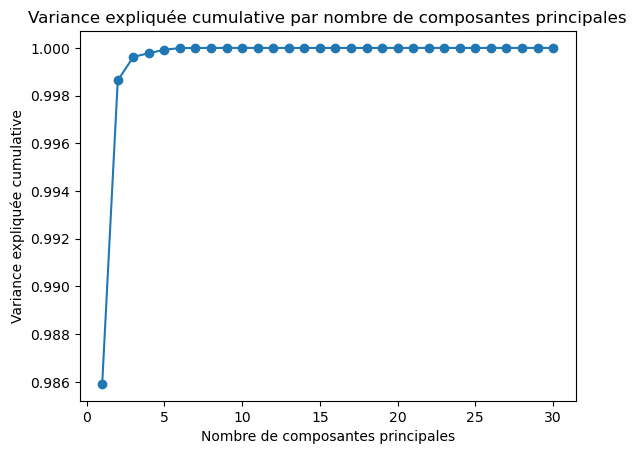

Nombre de composantes principales pour expliquer 95.0% de la variance : 1
Features sélectionnées : ['months_as_customer', 'policy_number', 'policy_state', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_csl', 'insured_occupation', 'insured_hobbies', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'auto_make', 'auto_model']


In [52]:
# Appliquer PCA
pca = PCA()
pca.fit(X)

# Analyser la variance expliquée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Tracer le graphique de la variance expliquée
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulative')
plt.title('Variance expliquée cumulative par nombre de composantes principales')
plt.show()

# Identifier le nombre de composantes à conserver
desired_variance = 0.95  # Vous pouvez ajuster ce seuil selon vos besoins
num_components = np.argmax(cumulative_variance >= desired_variance) + 1
print("Nombre de composantes principales pour expliquer {}% de la variance : {}".format(desired_variance * 100, num_components))

# Sélectionner les composantes principales
selected_components = pca.components_[:num_components]

# Récupérer les noms des features
feature_names = X.columns

# Afficher les features sélectionnées
selected_features = [feature_names[i] for i in range(len(feature_names)) if selected_components[:, i].any()]
print("Features sélectionnées :", selected_features)

In [53]:
len(selected_features)


30

In [54]:
selected_features


['months_as_customer',
 'policy_number',
 'policy_state',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'policy_csl',
 'insured_occupation',
 'insured_hobbies',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'auto_make',
 'auto_model']

In [55]:
from sklearn.feature_selection import VarianceThreshold

# Créez un objet VarianceThreshold
threshold = 0.1  # Définissez le seuil de variance
variance_selector = VarianceThreshold(threshold=threshold)

# Appliquez VarianceThreshold sur vos données
nouvelles_donnees = variance_selector.fit_transform(X)

# Obtenez les indices des fonctionnalités sélectionnées
indices_selectionnes = variance_selector.get_support(indices=True)

# Obtenez les noms des fonctionnalités sélectionnées à partir de vos données d'origine
fonctionnalites_selectionnees = X.columns[indices_selectionnes]

fonctionnalites_selectionnees




Index(['months_as_customer', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'policy_csl', 'insured_occupation', 'insured_hobbies',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'auto_make',
       'auto_model'],
      dtype='object')

In [56]:
len(fonctionnalites_selectionnees)

30

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21778 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           21778 non-null  int64  
 1   policy_number                21778 non-null  int64  
 2   policy_state                 21778 non-null  int64  
 3   policy_deductable            21778 non-null  int64  
 4   policy_annual_premium        21778 non-null  float64
 5   umbrella_limit               21778 non-null  int64  
 6   insured_zip                  21778 non-null  int64  
 7   insured_sex                  21778 non-null  int64  
 8   capital-gains                21778 non-null  int64  
 9   capital-loss                 21778 non-null  int64  
 10  incident_hour_of_the_day     21778 non-null  int64  
 11  number_of_vehicles_involved  21778 non-null  int64  
 12  property_damage              21778 non-null  int64  
 13  bodily_injuries   

In [58]:
X = pd.concat([X, data3['incident_type']], axis=1)

In [59]:
X.drop(columns=['policy_state'], inplace=True)
X.drop(columns=['policy_number'], inplace=True)
X.drop(columns=['umbrella_limit'], inplace=True)

In [60]:
X.drop(columns=['incident_hour_of_the_day'], inplace=True)
X.drop(columns=['number_of_vehicles_involved'], inplace=True)

In [61]:
X = pd.concat([X, data3['incident_state']], axis=1)
X = pd.concat([X, data3['authorities_contacted']], axis=1)

# Modeling

vue que la base de données ne possede pas de variable cible donc on va utiliser pour la modelisation les methodes d'apprentissage non supervisé

Donc on va divider notre base de données a deux clusters un pour l'ensemble fraudé et l'autre non fraudé on va utiliser les methodes k-means , GMM ..... puis pour la phase d'evaluation on va utiliser les valeurs de silhouettes  puis optimiser les modeles pour ameliorer la performance 

In [62]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test (par exemple, avec un ratio de 80% pour l'entraînement et 20% pour les tests)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)



In [159]:
X.dtypes

months_as_customer               int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
dtype: object

In [70]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_blobs

# Générer des données pour l'exemple
X, _ = make_blobs(n_samples=1000, centers=2, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Créer un objet KMeans
kmeans = KMeans(n_clusters=2)

# Utiliser la validation croisée pour évaluer KMeans sur l'ensemble d'entraînement
cv_scores = cross_val_score(kmeans, X_train, cv=5)

# Afficher les scores de validation croisée
print("Scores de validation croisée:", cv_scores)
print("Moyenne des scores de validation croisée:", cv_scores.mean())

# Ajuster KMeans sur l'ensemble d'entraînement complet avec les paramètres optimaux trouvés
kmeans.fit(X_train)

# Évaluer la performance de KMeans sur l'ensemble de test
test_score = kmeans.score(X_test)
print("Score sur l'ensemble de test:", test_score)


Scores de validation croisée: [-285.95410525 -346.9539066  -298.0424671  -347.72695132 -294.95078246]
Moyenne des scores de validation croisée: -314.7256425452416
Score sur l'ensemble de test: -385.4377349911798


C:\Users\asus tuf\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus tuf\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus tuf\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus tuf\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

Scores de validation croisée :
Ces scores indiquent à quel point les clusters créés par KMeans sont cohérents et bien séparés les uns des autres.
Des scores plus faibles indiquent que les données sont mieux séparées en clusters distincts, ce qui pourrait être bénéfique dans la détection de fraudes. Cela signifie que les transactions frauduleuses sont susceptibles d'être regroupées dans des clusters distincts des transactions normales.

Score moyen de validation croisée :
C'est la moyenne des scores de validation croisée sur toutes les partitions de vos données d'entraînement.
Une moyenne plus basse indique une meilleure séparation des clusters, ce qui peut être bénéfique pour la détection de fraudes.

Score sur l'ensemble de test :
C'est la performance de votre modèle KMeans sur un ensemble de données distinctes qui n'a pas été utilisé lors de l'entraînement ou de la validation croisée.
Ce score donne une indication de la capacité de votre modèle à généraliser et à détecter les fraudes dans de nouvelles données non vues.

In [71]:
# Analyser les clusters en utilisant les attributs de KMeans
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Afficher les caractéristiques des clusters
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}:")
    print(f"Center: {center}")
    print(f"Number of points: {np.sum(cluster_labels == i)}")
    # Afficher d'autres caractéristiques des données dans ce cluster si nécessaire


Cluster 1:
Center: [4.69172751 2.0466987 ]
Number of points: 403
Cluster 2:
Center: [-2.47168951  9.01744807]
Number of points: 397


In [78]:
# Analyse des clusters
for cluster_id in range(kmeans.n_clusters):
    # Sélectionner les échantillons dans ce cluster
    cluster_samples = X_train[cluster_labels_train == cluster_id]
    
    # Calculer les statistiques descriptives pour ce cluster
    cluster_mean = np.mean(cluster_samples, axis=0)
    cluster_std = np.std(cluster_samples, axis=0)
    
    # Afficher les statistiques descriptives du cluster
    print(f"Cluster {cluster_id}:")
    print(f"Nombre d'échantillons dans le cluster: {len(cluster_samples)}")
    print(f"Moyenne des caractéristiques: {cluster_mean}")
    print(f"Ecart-type des caractéristiques: {cluster_std}")
    print("\n")


Cluster 0:
Nombre d'échantillons dans le cluster: 403
Moyenne des caractéristiques: [4.69172751 2.0466987 ]
Ecart-type des caractéristiques: [0.9567444  1.04618178]


Cluster 1:
Nombre d'échantillons dans le cluster: 397
Moyenne des caractéristiques: [-2.47168951  9.01744807]
Ecart-type des caractéristiques: [0.97926552 0.97208144]




C:\Users\asus tuf\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


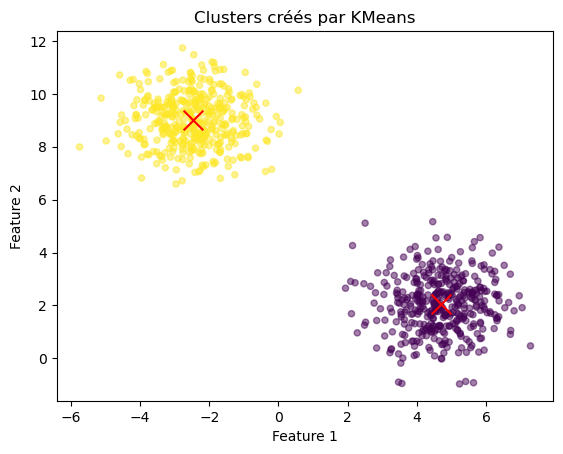

In [74]:
import matplotlib.pyplot as plt

# Ajuster KMeans sur l'ensemble d'entraînement complet
kmeans.fit(X_train)

# Obtenir les labels de cluster pour l'ensemble d'entraînement
cluster_labels_train = kmeans.labels_

# Obtenir les centres de cluster
cluster_centers = kmeans.cluster_centers_

# Visualiser les clusters en utilisant les deux premières dimensions
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels_train, cmap='viridis', s=20, alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
plt.title('Clusters créés par KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


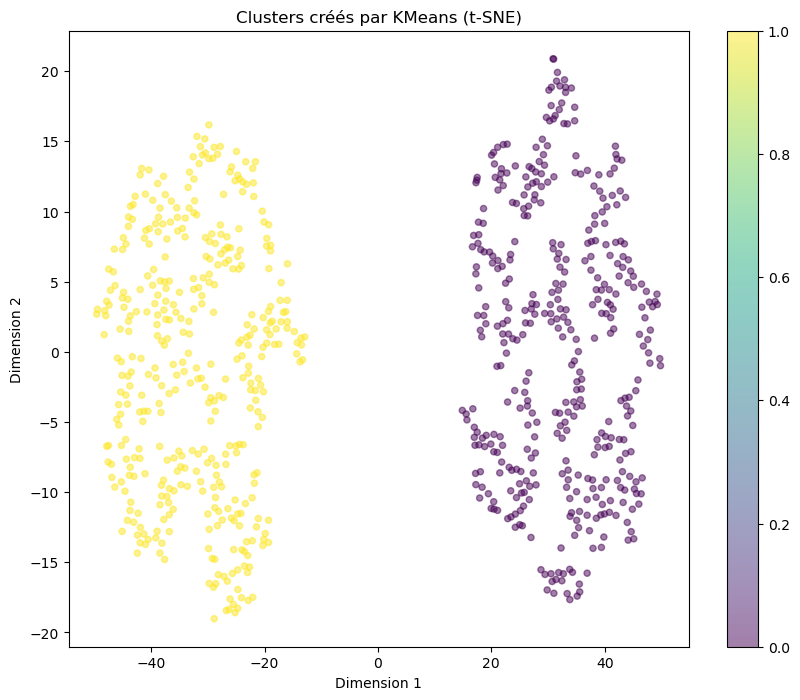

In [86]:
from sklearn.manifold import TSNE

# Réduire la dimension des données avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Visualiser les clusters dans un espace de dimension réduite
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels_train, cmap='viridis', s=20, alpha=0.5)
plt.colorbar()
plt.title('Clusters créés par KMeans (t-SNE)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [76]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Supposons que `cluster_labels` contient les labels de cluster prédits par votre algorithme de clustering

# Silhouette Score
silhouette = silhouette_score(X_train, cluster_labels)
print("Silhouette Score:", silhouette)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_train, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_train, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)


Silhouette Score: 0.8237555427559138
Davies-Bouldin Index: 0.24825038822473106
Calinski-Harabasz Index: 10182.566601891735


Silhouette Score : 0.8238
Un score de silhouette proche de 1 indique que les clusters sont bien séparés et densément peuplés.
Un score de silhouette proche de 0 indique un chevauchement significatif entre les clusters.
Un score de silhouette négatif indique que les échantillons ont été attribués au mauvais cluster.

Davies-Bouldin Index : 0.2483
Plus l'indice de Davies-Bouldin est proche de zéro, mieux c'est. Un indice de Davies-Bouldin plus faible indique une meilleure séparation entre les clusters.
Les valeurs supérieures à 1 indiquent généralement des clusters qui se chevauchent.

Calinski-Harabasz Index : 10182.57
Un score élevé du Calinski-Harabasz Index indique des clusters denses et bien séparés.

In [84]:
# Testez différents nombres de clusters pour voir lequel donne les meilleurs résultats
for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_train)
    cluster_labels = kmeans.labels_
    silhouette = silhouette_score(X_train, cluster_labels)
    print(f"Nombre de clusters : {n_clusters}, Silhouette Score : {silhouette}")

    

Nombre de clusters : 2, Silhouette Score : 0.8237555427559138
Nombre de clusters : 3, Silhouette Score : 0.5639877481797378
Nombre de clusters : 4, Silhouette Score : 0.3216473575684462


C:\Users\asus tuf\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus tuf\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus tuf\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [154]:
import numpy as np

# Définir un seuil pour identifier les échantillons atypiques
seuil = 2.0  # Vous pouvez ajuster cette valeur en fonction de vos besoins

# Calculer les distances entre les échantillons du cluster et leur centre
distances = np.linalg.norm(cluster_samples - cluster_centers[cluster_id], axis=1)

# Identifier les échantillons ayant une distance supérieure à un certain seuil
outliers_indices = np.where(distances > seuil)[0]

# Afficher les échantillons atypiques
if len(outliers_indices) > 0:
    print("Échantillons atypiques identifiés :")
    for idx in outliers_indices:
        print("Indice de l'échantillon atypique :", idx)
else:
    print("Aucun échantillon atypique identifié.")


Échantillons atypiques identifiés :
Indice de l'échantillon atypique : 1
Indice de l'échantillon atypique : 5
Indice de l'échantillon atypique : 8
Indice de l'échantillon atypique : 9
Indice de l'échantillon atypique : 35
Indice de l'échantillon atypique : 41
Indice de l'échantillon atypique : 49
Indice de l'échantillon atypique : 51
Indice de l'échantillon atypique : 59
Indice de l'échantillon atypique : 66
Indice de l'échantillon atypique : 77
Indice de l'échantillon atypique : 79
Indice de l'échantillon atypique : 82
Indice de l'échantillon atypique : 97
Indice de l'échantillon atypique : 98
Indice de l'échantillon atypique : 103
Indice de l'échantillon atypique : 113
Indice de l'échantillon atypique : 114
Indice de l'échantillon atypique : 127
Indice de l'échantillon atypique : 128
Indice de l'échantillon atypique : 132
Indice de l'échantillon atypique : 139
Indice de l'échantillon atypique : 142
Indice de l'échantillon atypique : 158
Indice de l'échantillon atypique : 164
Indice d

Les indices affichés correspondent à ces échantillons atypiques dans votre ensemble de données.  ce qui signifie qu'ils se distinguent du reste des observations en raison de valeurs inhabituelles ou extrêmes dans au moins une de leurs caractéristiques

Il est important d'examiner de près ces observations pour comprendre pourquoi elles se comportent différemment et décider de la manière de les traiter dans votre analyse.

# MeanShift

In [156]:
from sklearn.cluster import MeanShift

# Créer un objet MeanShift
meanshift = MeanShift()

# Ajuster le modèle aux données
labels1 = meanshift.fit_predict(X)


In [160]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Génération de données synthétiques pour l'exemple
X, _ = make_blobs(n_samples=1000, centers=2, n_features=16, random_state=42)

# Création d'un objet MeanShift
meanshift = MeanShift()

# Entraînement du modèle
meanshift.fit(X)

# Prédiction des étiquettes de regroupement
labels = meanshift.labels_

# Évaluation du modèle
silhouette_avg = silhouette_score(X, labels)
print("Score de silhouette:", silhouette_avg)


Score de silhouette: 0.7707462210327293


# GaussianMixture

In [66]:
from sklearn.mixture import GaussianMixture

# Créer un objet GaussianMixture avec le nombre de composants souhaité
gmm = GaussianMixture(n_components=2)

# Ajuster le modèle aux données
gmm.fit(X)

# Obtenez les étiquettes de cluster pour chaque point de données
labels = gmm.predict(X)


# Evaluation 

# GridSearch